In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                     strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval()) #원래 이미지와 동일한 모양이 나온다

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


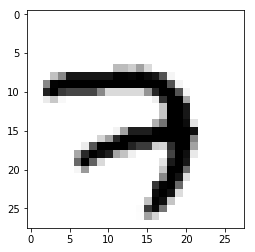

In [4]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


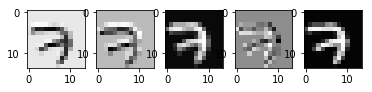

In [5]:
## MNIST convolution layer ##
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
# filter setting
#3*3 filter, one color, 5 filters
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) 

# stride, padding setting
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') 
#결과는 14*14
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

# 5장의 필터를 썼으므로 출력 결과는 다섯장의 14*14 이미지가 된다.
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='Greys')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


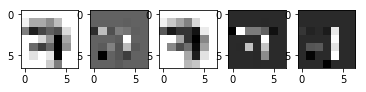

In [6]:
# pooling layer setting
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], 
                      strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

# 2*2 max pooling 썼으므로 결과는 다섯장의 7*7 sub sampling이미지가 된다.
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='Greys')